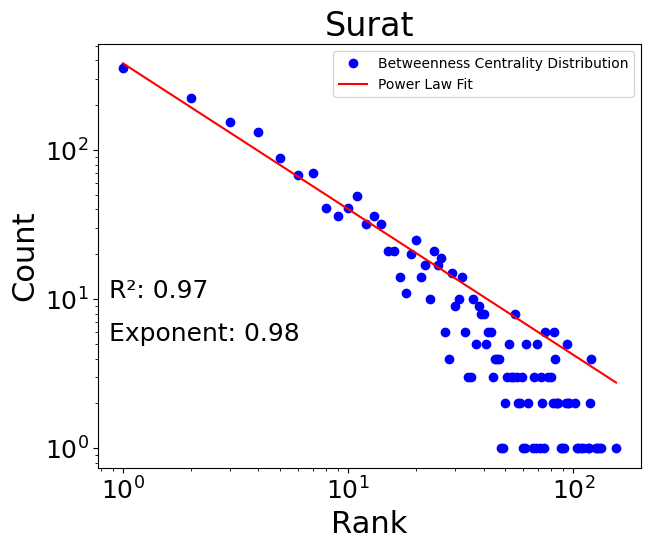

In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read edge list from .csv file
edge_list_file = 'Surat.csv'
G = nx.Graph()

with open(edge_list_file, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header row if present
    for row in reader:
        source = row[0]
        target = row[1]
        G.add_edge(source, target)

# Compute the betweenness centrality distribution
betweenness = nx.betweenness_centrality(G).values()
betweenness_counts = np.bincount(np.array(list(map(lambda x: int(x * 1000), betweenness))))

# Filter out zero betweenness centrality
betweenness_counts = betweenness_counts[1:]

# Define the power law function
def power_law(x, a, b):
    return a * np.power(x, -b)

# Define the x and y for power law fit
x = np.arange(len(betweenness_counts)) + 1
y = betweenness_counts

# Perform the power law fit
popt, pcov = curve_fit(power_law, x, y)

# Calculate R²
residuals = y - power_law(x, *popt)
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
r_squared = round(r_squared, 2)

# Get the power law exponent
power_law_exponent = popt[1]
power_law_exponent = round(power_law_exponent, 2)

# Create log-log plot of the betweenness centrality distribution
plt.figure(figsize=(7, 5.5))  # Set figure size
plt.loglog(x, y, 'bo', label='Betweenness Centrality Distribution')  # Increase marker size
plt.loglog(x, power_law(x, *popt), color='r', label='Power Law Fit',)

# Display R² and power law exponent
plt.text(0.02, 0.4, f'R²: {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=18)  # Increase font size
plt.text(0.02, 0.3, f'Exponent: {power_law_exponent:.2f}', transform=plt.gca().transAxes, fontsize=18)  # Increase font size

plt.xlabel('Rank', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Surat', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()

plt.show()